In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emachine as EM

In [2]:
np.random.seed(0)

In [3]:
seqs = np.loadtxt('s_train.dat')

In [4]:
ops = EM.operators(seqs)
ops.shape

(460, 741)

In [5]:
eps_list = np.linspace(0.7,0.9,21)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    print(eps,E_eps[i])

0.7 -90.97125777628806
0.71 -90.0370848291644
0.72 -89.15520227069703
0.73 -88.32627999469725
0.74 -87.55128825637009
0.75 -86.83153251386894
0.76 -86.16869719480155
0.77 -85.56490097359782
0.78 -85.02276703643429
0.79 -84.54551302868458
0.8 -84.13706706648992
0.81 -83.80221856526629
0.8200000000000001 -83.5468160312931
0.8300000000000001 -83.37802891266647
0.84 -83.30469797326157
0.85 -83.33780984673744
0.86 -83.49114880046875
0.87 -83.7822063148659
0.88 -84.2334739245864
0.89 -84.87431965602296
0.9 -85.74377728370874


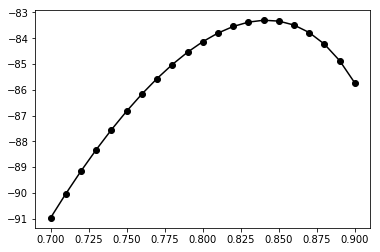

In [6]:
plt.plot(eps_list,E_eps,'ko-')

In [7]:
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

The optimal value of eps: 0.84


So our inferred interactions from our eps machine should be

In [8]:
w_em = w_eps[ieps]

np.savetxt('w_em.dat',w_em,fmt='%f')

In [9]:
## # Maximum Likelihood Estimation (MLE)
#w_mle = EM.MLE_method(seqs)
#np.savetxt('w_mle.dat',w_mle,fmt='%f')

# Pseudo Likelihood Estimation (PLE)
w_ple = EM.PLE_method(seqs)
np.savetxt('w_ple.dat',w_ple,fmt='%f')

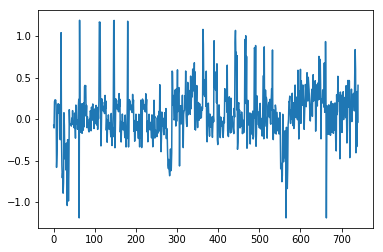

In [10]:
plt.plot(w_em)